In [1]:
from __future__ import print_function
import pylab as pl
import seaborn
%pylab inline
from scipy.optimize import curve_fit, minimize

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Universal 

In [2]:
np.random.seed(999)
md = {}
mean = 100
std = 30
mysize = (np.random.rand(100) * 2000).astype(int)
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[1606 1055  238 1279  181  664  854 1108 1256 1394 1579  263  685  403 1414
   66 1818  810 1520  947  573 1502  194  824  563  780 1742  162 1115 1095
  664 1946  572 1016  295  392 1681    7 1565 1666 1875 1945 1665  131  807
  749 1015 1955 1637  375 1396 1365 1998  965 1461 1590  522  322 1397 1799
 1830  624 1908 1448   41 1451 1163 1909 1484  395 1898 1716  898 1647 1994
 1128 1178  848 1790  888 1154 1320  604   45 1675  639  751  363 1662  369
 1939 1392 1211  992 1417  520 1305 1245 1672  714] (100,)


# Normal Distribution

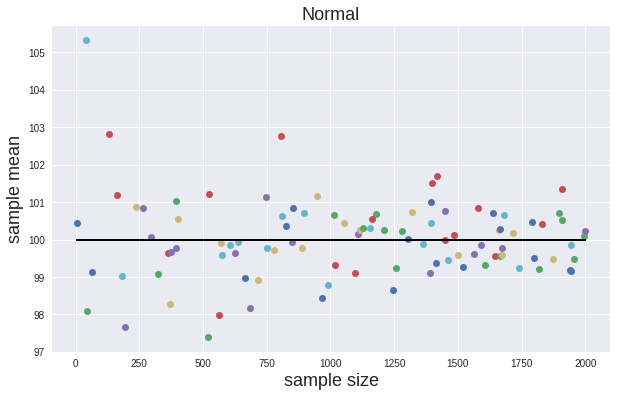

In [3]:
md['normal'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['normal'][n] = np.random.normal(mean, std, size = n)
    
# save the means for plotting later    

md['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')

### Fig 1. This shows that as the sample size increases, it moves toward the mean. 

# Poisson

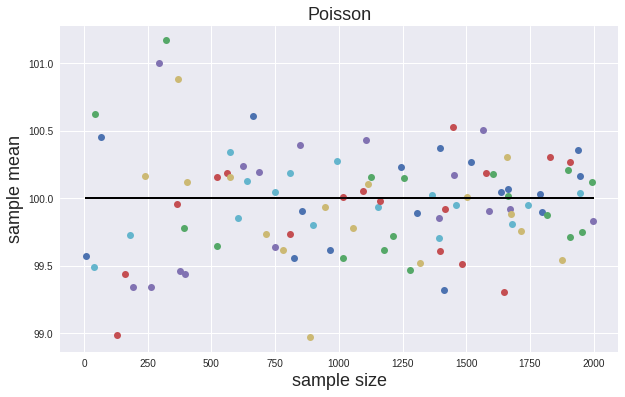

In [4]:
md['pois'] = {} 

for n in mysize:
    md['pois'][n] = np.random.poisson(mean, size = n)

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')

### Fig 2. This shows that as the sample size increases, it moves toward the mean. 

# Binomial

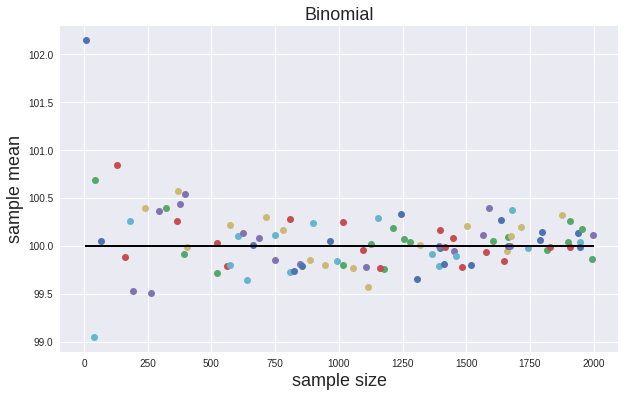

In [5]:
md['binom'] = {} 

for n in mysize:
    md['binom'][n] = np.random.binomial(n = 200, p = 0.5, size = n)

md['binom']['means'] = {}
axbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binom']:
    if not type(nn) == str:
        md['binom']['means'][nn] = md['binom'][nn].mean()
        axbinom_mu_n.plot(nn, md['binom']['means'][nn], 'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinom_mu_n.set_title('Binomial', fontsize=18)
        axbinom_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')

### Fig 3. This shows that as the sample size increases, it moves toward the mean. 

# Chi Square Distribution

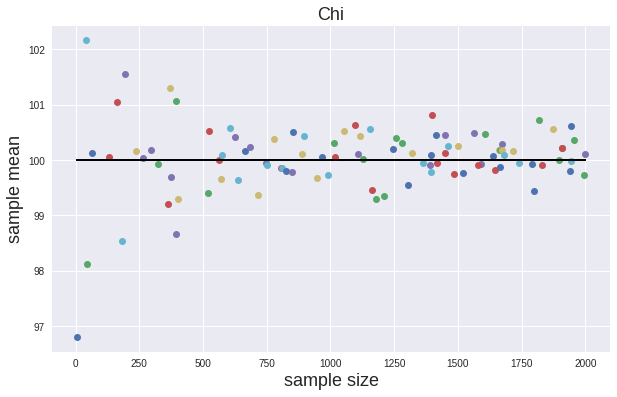

In [6]:
md['chiq'] = {} 

for n in mysize:
    md['chiq'][n] = np.random.chisquare(mean, size = n)

md['chiq']['means'] = {}
axchiq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chiq']:
    if not type(nn) == str:
        md['chiq']['means'][nn] = md['chiq'][nn].mean()
        axchiq_mu_n.plot(nn, md['chiq']['means'][nn], 'o')
        axchiq_mu_n.set_xlabel('sample size', fontsize=18)
        axchiq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchiq_mu_n.set_title('Chi', fontsize=18)
        axchiq_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')

### Fig 4. This shows that as the sample size increases, it moves toward the mean. 

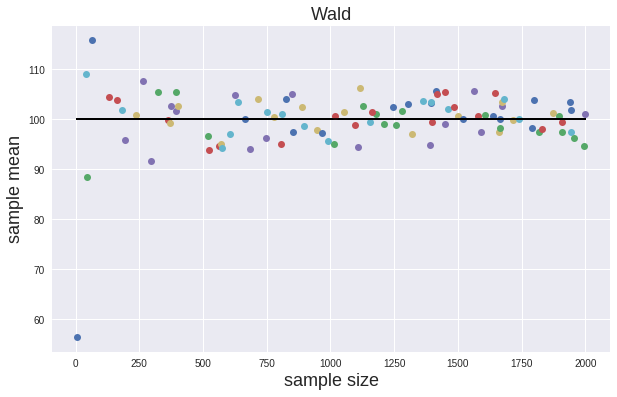

In [7]:
md['wald'] = {} 

for n in mysize:
    md['wald'][n] = np.random.wald(mean, 100, size = n)

md['wald']['means'] = {}
axwald_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['wald']:
    if not type(nn) == str:
        md['wald']['means'][nn] = md['wald'][nn].mean()
        axwald_mu_n.plot(nn, md['wald']['means'][nn], 'o')
        axwald_mu_n.set_xlabel('sample size', fontsize=18)
        axwald_mu_n.set_ylabel('sample mean', fontsize=18)
        axwald_mu_n.set_title('Wald', fontsize=18)
        axwald_mu_n.plot([min(mysize), max(mysize)], [mean, mean], 'k')

### Fig 5. This shows that as the sample size increases, it moves toward the mean. 

# Histogram


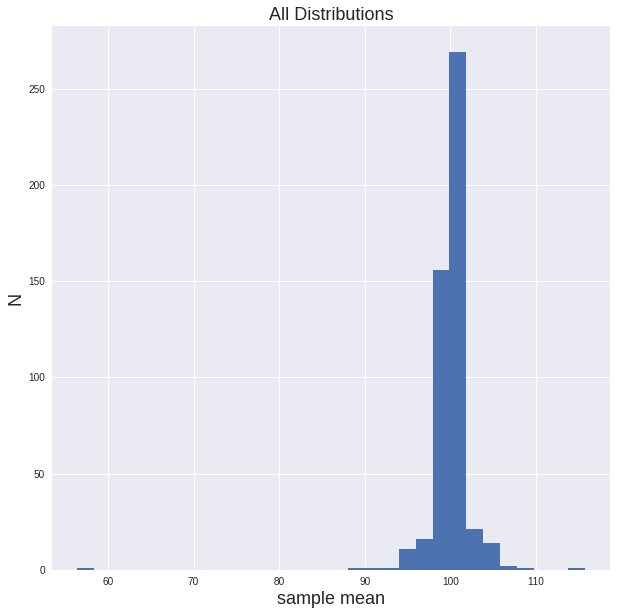

In [8]:
allmeans = list((md['pois']['means'].values()+ 
                md['normal']['means'].values()+
                md['chiq']['means'].values())+
                md['binom']['means'].values()+
                md['wald']['means'].values())
                
                
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('All Distributions', fontsize= 18)

### Fig 6. Sample means plotted as a histogram. 